In [150]:
#FIRST WE WILL IMPORT THE MODULES TO BE USED:

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#DATASET
#adj_close is adjusted close prices
#ticker=stocks of companies

In [5]:
quandl.ApiConfig.api_key = '9n2yt_ks4735qjwjFxeh'
stocks = ['AAPL','AMZN','GOOGL','FB']
data = quandl.get_table('WIKI/PRICES', ticker = stocks,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2016-1-1', 'lte': '2017-12-31' }, paginate=True)
data

,date,ticker,adj_close
None,,,
0,2017-12-29,GOOGL,1053.400000
1,2017-12-28,GOOGL,1055.950000
2,2017-12-27,GOOGL,1060.200000
3,2017-12-26,GOOGL,1065.850000
4,2017-12-22,GOOGL,1068.860000
5,2017-12-21,GOOGL,1070.850000
6,2017-12-20,GOOGL,1073.560000
7,2017-12-19,GOOGL,1079.780000
8,2017-12-18,GOOGL,1085.090000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 3 columns):
date         2006 non-null datetime64[ns]
ticker       2006 non-null object
adj_close    2006 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 47.1+ KB


In [7]:
df = data.set_index('date')
table = df.pivot(columns='ticker')
# col[1] to select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table


,AAPL,AMZN,FB,GOOGL
date,,,,
2016-01-04,101.783763,636.99,102.22,759.44
2016-01-05,99.233131,633.79,102.73,761.53
2016-01-06,97.291172,632.65,102.97,759.33
2016-01-07,93.185040,607.94,97.92,741.00
2016-01-08,93.677776,607.05,97.33,730.91
2016-01-11,95.194629,617.74,97.51,733.07
2016-01-12,96.576222,617.89,99.37,745.34
2016-01-13,94.093220,581.81,95.44,719.57
2016-01-14,96.151117,593.00,98.37,731.39


In [15]:
#GRAPH OF EACH STOCK


Text(0.5, 0, 'Year')

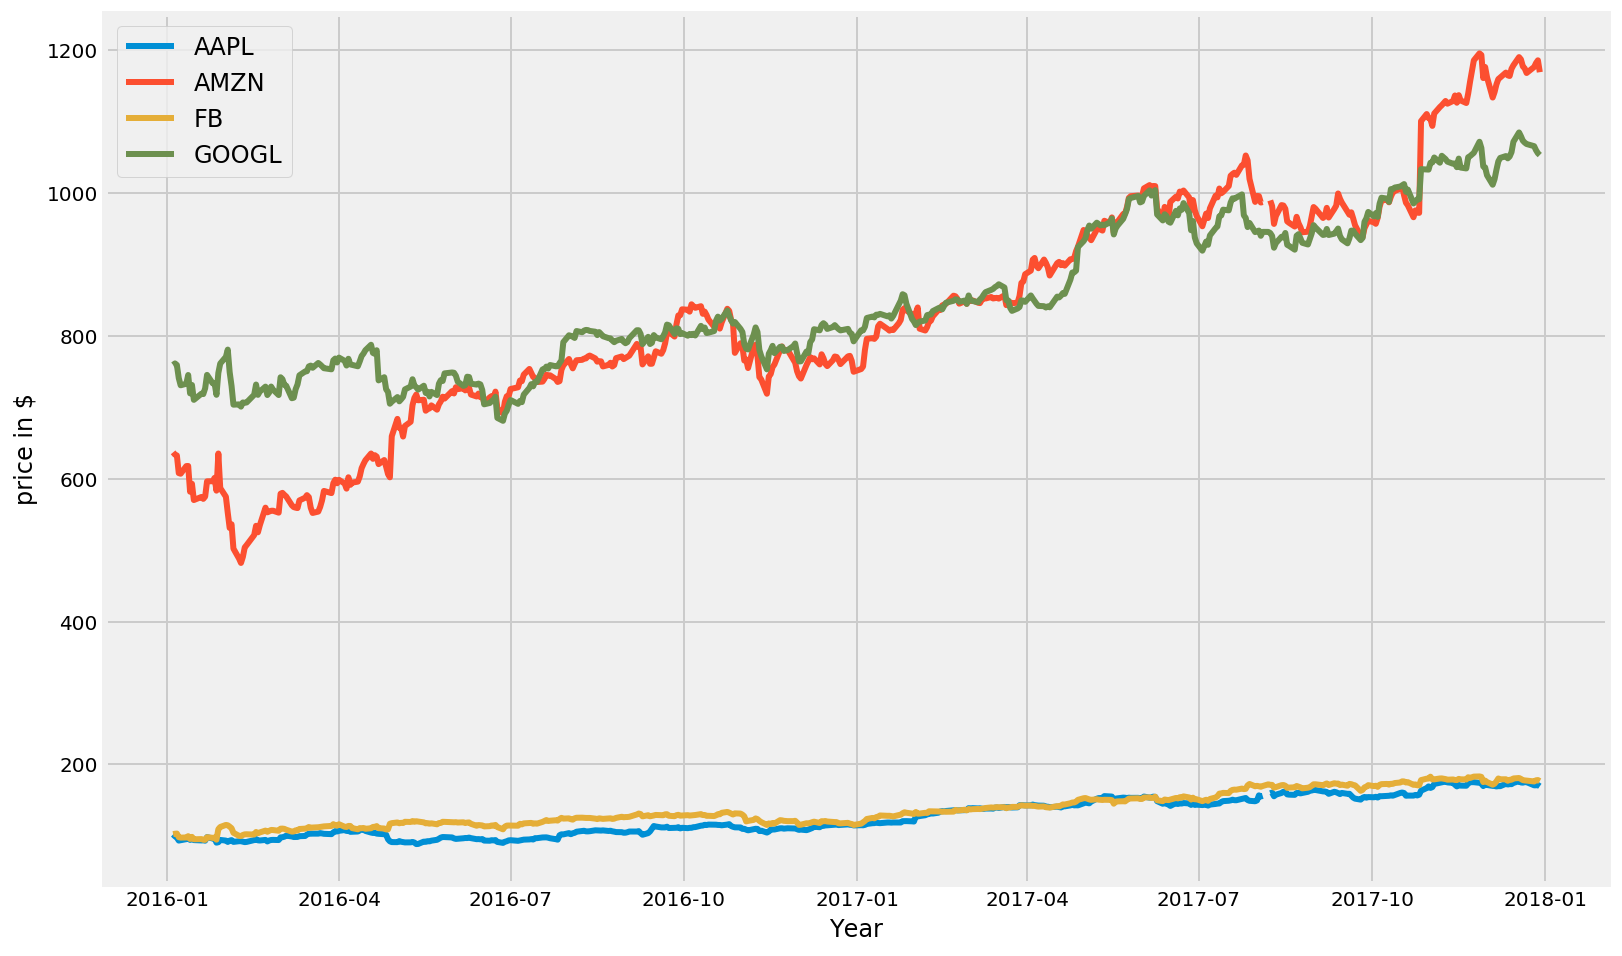

In [18]:

plt.figure(figsize=(12, 8))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')
plt.xlabel('Year')

In [10]:
#Amazon and Google’s stock price is relatively more expensive than those of Facebook and Apple.



#now plotting percent change of one day that will be daily returns

Text(0, 0.5, 'daily returns')

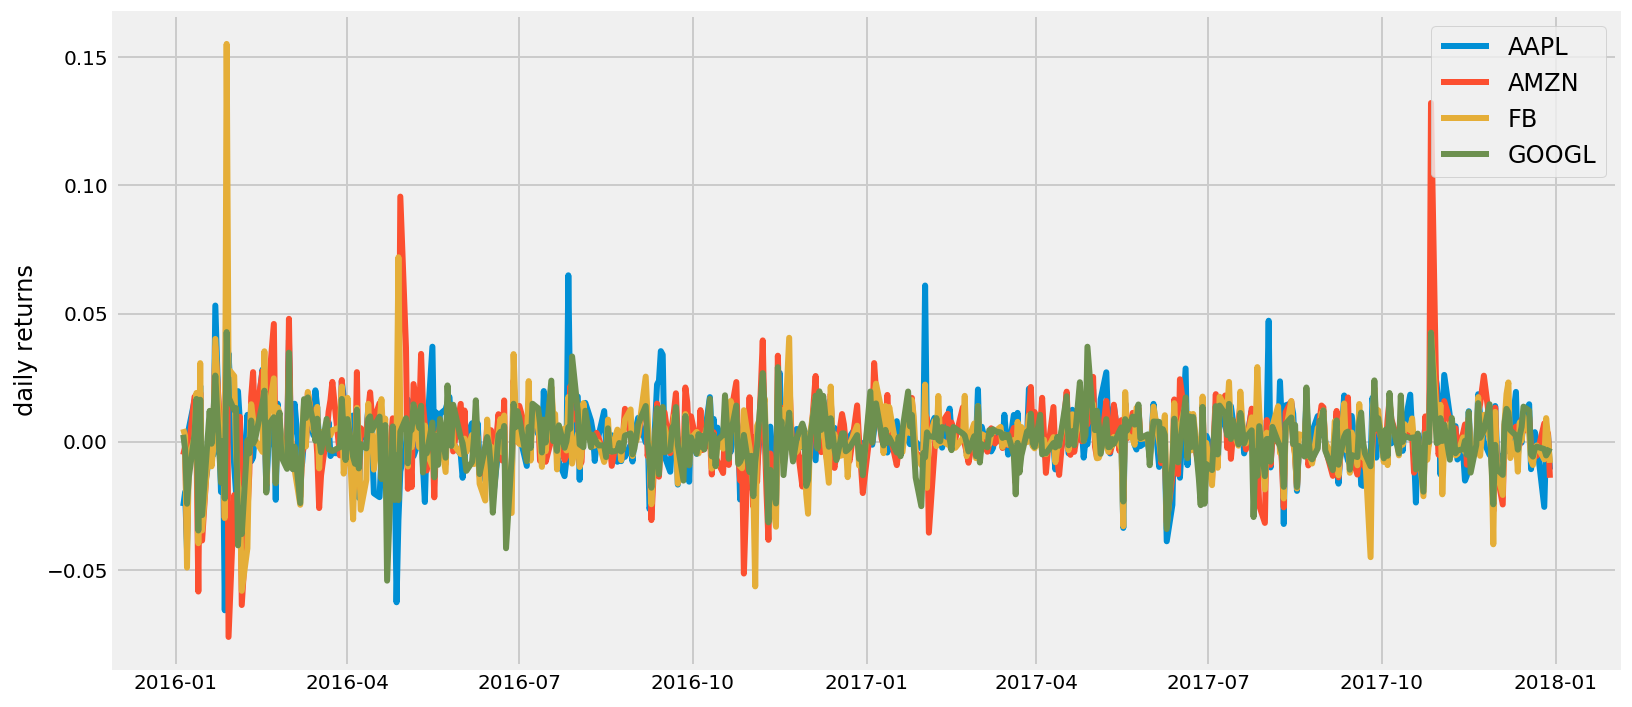

In [19]:
returns1 = table.pct_change()
plt.figure(figsize=(12, 6))
for c in returns1.columns.values:
    plt.plot(returns1.index, returns1[c], lw=3,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [45]:
#here Facebook has one spike and amazon has two positive and few negative spikes.
#Amazon has several variation while google has stable plot. Amazon stock can be risky.

In [132]:
port_returns = []
port_risks = []
stock_weights = []
sharpe_ratio=[]
returns1=table.pct_change()
mean_returns = returns1.mean()
returns_annual=mean_returns*252
cov_matrix = returns1.cov()
cov_annual=cov_matrix*252
num_assets = 4
num_portfolios = 25000
np.random.seed(101)

for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    risks = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / risks
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_risks.append(risks)
    stock_weights.append(weights)

portfolio = {'Returns': port_returns,
             'Risks': port_risks,
            'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(table):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

df = pd.DataFrame(portfolio)

df.head()

,Returns,Risks,Sharpe Ratio,AAPL weight,AMZN weight,FB weight,GOOGL weight
0,0.291694,0.185524,1.572267,0.401223,0.443388,0.022123,0.133266
1,0.266736,0.174785,1.526079,0.251963,0.306608,0.112865,0.328564
2,0.272262,0.172612,1.577307,0.396923,0.104486,0.304882,0.193709
3,0.299614,0.198961,1.505896,0.084002,0.362809,0.445883,0.107306
4,0.293460,0.198334,1.479627,0.049376,0.356635,0.430760,0.163229


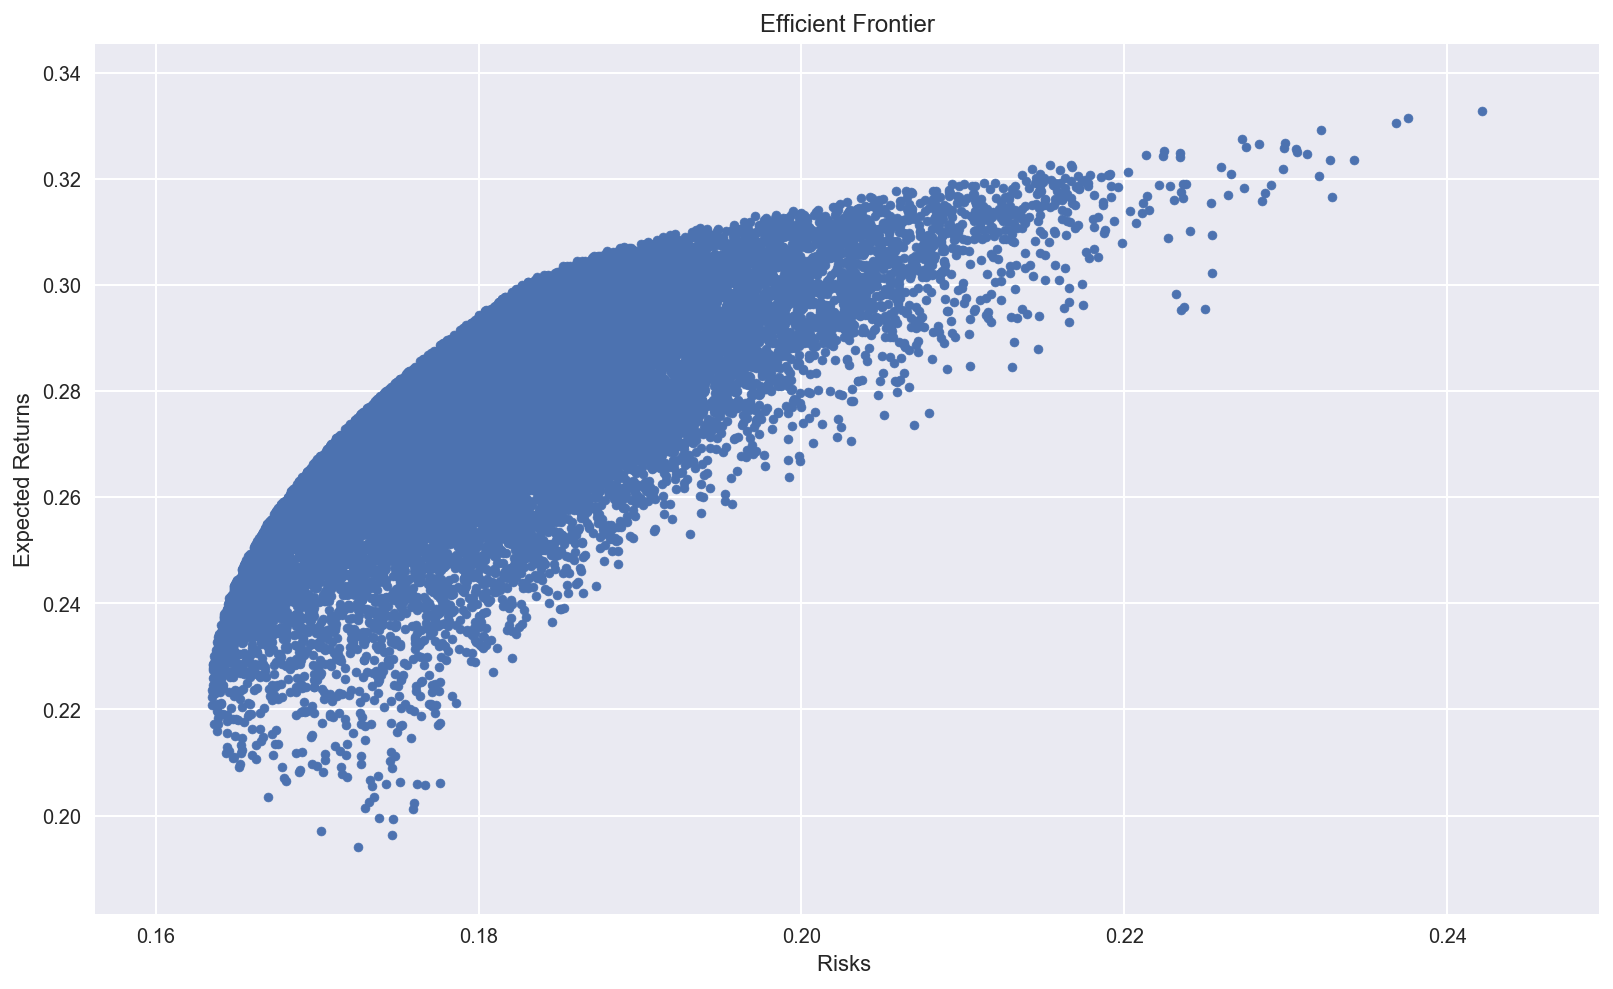

In [142]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Risks', y='Returns', figsize=(12, 8), grid=True)
plt.xlabel('Risks ')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

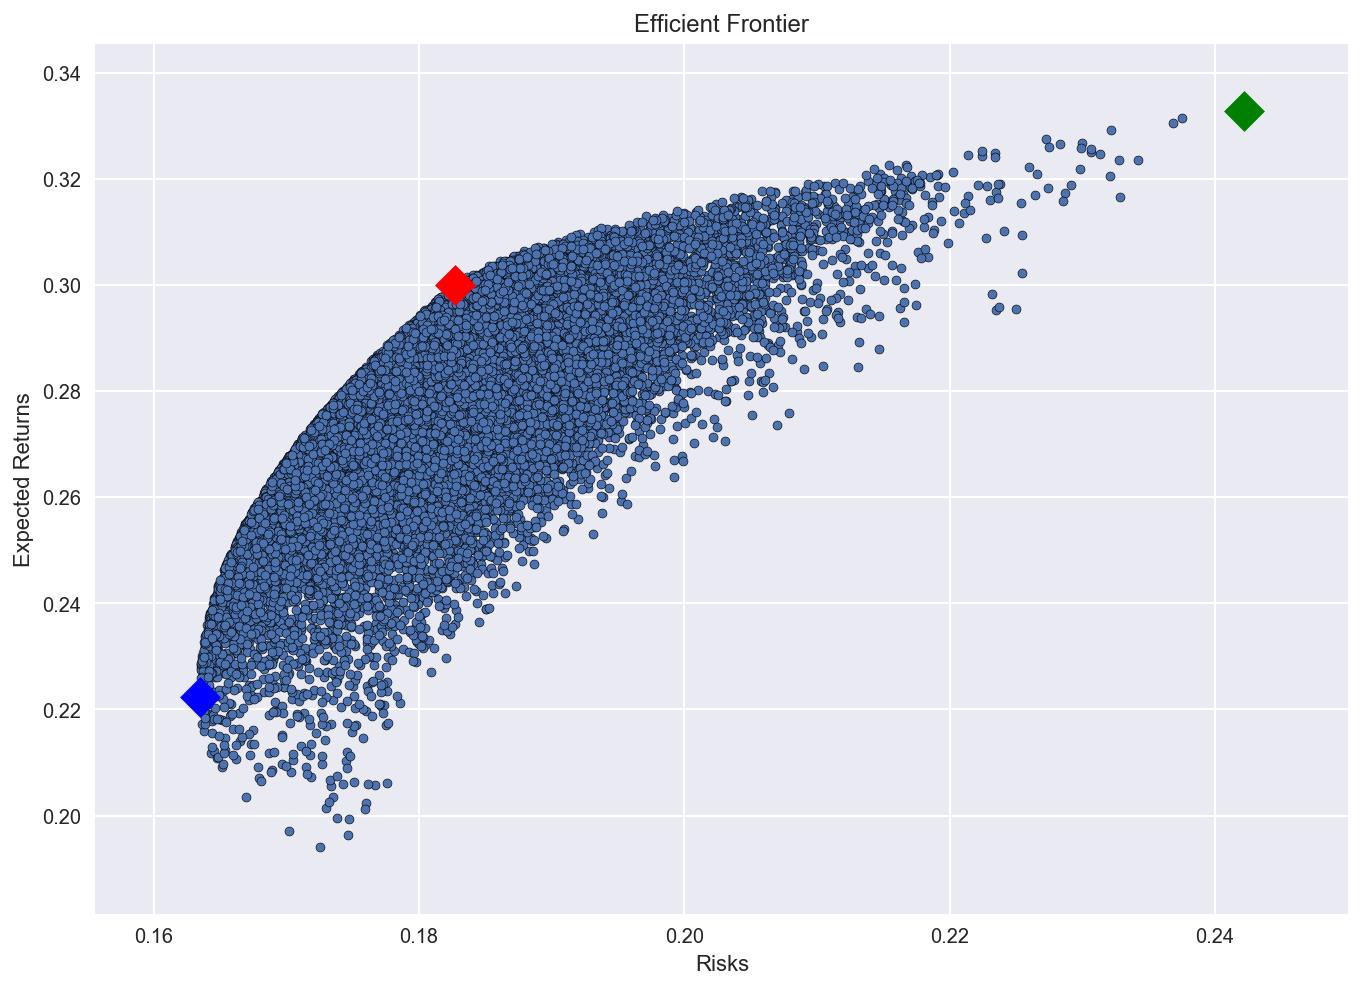

Minimum Risk Portfolio                  22918
Returns       0.222417
Risks         0.163472
Sharpe Ratio  1.360580
AAPL weight   0.344007
AMZN weight   0.005949
FB weight     0.063331
GOOGL weight  0.586713
Optimised Portfolio                  15901
Returns       0.300118
Risks         0.182701
Sharpe Ratio  1.642674
AAPL weight   0.463220
AMZN weight   0.271718
FB weight     0.264923
GOOGL weight  0.000138


In [137]:
min_risks = df['Risks'].min()
max_sharpe = df['Sharpe Ratio'].max()
max_returns=df['Returns'].max()

sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_risk_port = df.loc[df['Risks'] == min_risks]
returns_portfolio=df.loc[df['Returns']==max_returns]

plt.style.use('seaborn-dark')
df.plot.scatter(x='Risks', y='Returns', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Risks'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_risk_port['Risks'], y=min_risk_port['Returns'], c='blue', marker='D', s=200 )
plt.scatter(x=returns_portfolio['Risks'],y=returns_portfolio['Returns'],c='green',marker='D',s=200)
plt.xlabel('Risks')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

print('Minimum Risk Portfolio',min_risk_port.T)
print('Optimised Portfolio',sharpe_portfolio.T)

In [53]:
#CASE 2:- rf not equals zero

In [138]:
port_returns = []
port_risks = []
stock_weights = []
sharpe_ratio=[]
cml_port=[]
returns1=table.pct_change()
mean_returns = returns1.mean()
returns_annual=mean_returns*252
cov_matrix = returns1.cov()
cov_annual=cov_matrix*252
num_assets = 4
num_portfolios = 25000
rf=0.0178
np.random.seed(101)

for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    #returns_annual = (mean_returns*weights ) *252
    returns = np.dot(weights, returns_annual)
    sh_returns=(np.dot(weights, returns_annual))-rf
    #cov_annual=np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    risks = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    cml=1.545374*risks+0.0178
    cml_port.append(cml)
    sharpe = sh_returns / risks
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_risks.append(risks)
    stock_weights.append(weights)
portfolio = {'Returns': port_returns,
             'Risks': port_risks,
            'Sharpe Ratio': sharpe_ratio}

for counter,symbol in enumerate(table):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

df = pd.DataFrame(portfolio)

df.head()

,Returns,Risks,Sharpe Ratio,AAPL weight,AMZN weight,FB weight,GOOGL weight
0,0.291694,0.185524,1.476323,0.401223,0.443388,0.022123,0.133266
1,0.266736,0.174785,1.424240,0.251963,0.306608,0.112865,0.328564
2,0.272262,0.172612,1.474186,0.396923,0.104486,0.304882,0.193709
3,0.299614,0.198961,1.416431,0.084002,0.362809,0.445883,0.107306
4,0.293460,0.198334,1.389879,0.049376,0.356635,0.430760,0.163229


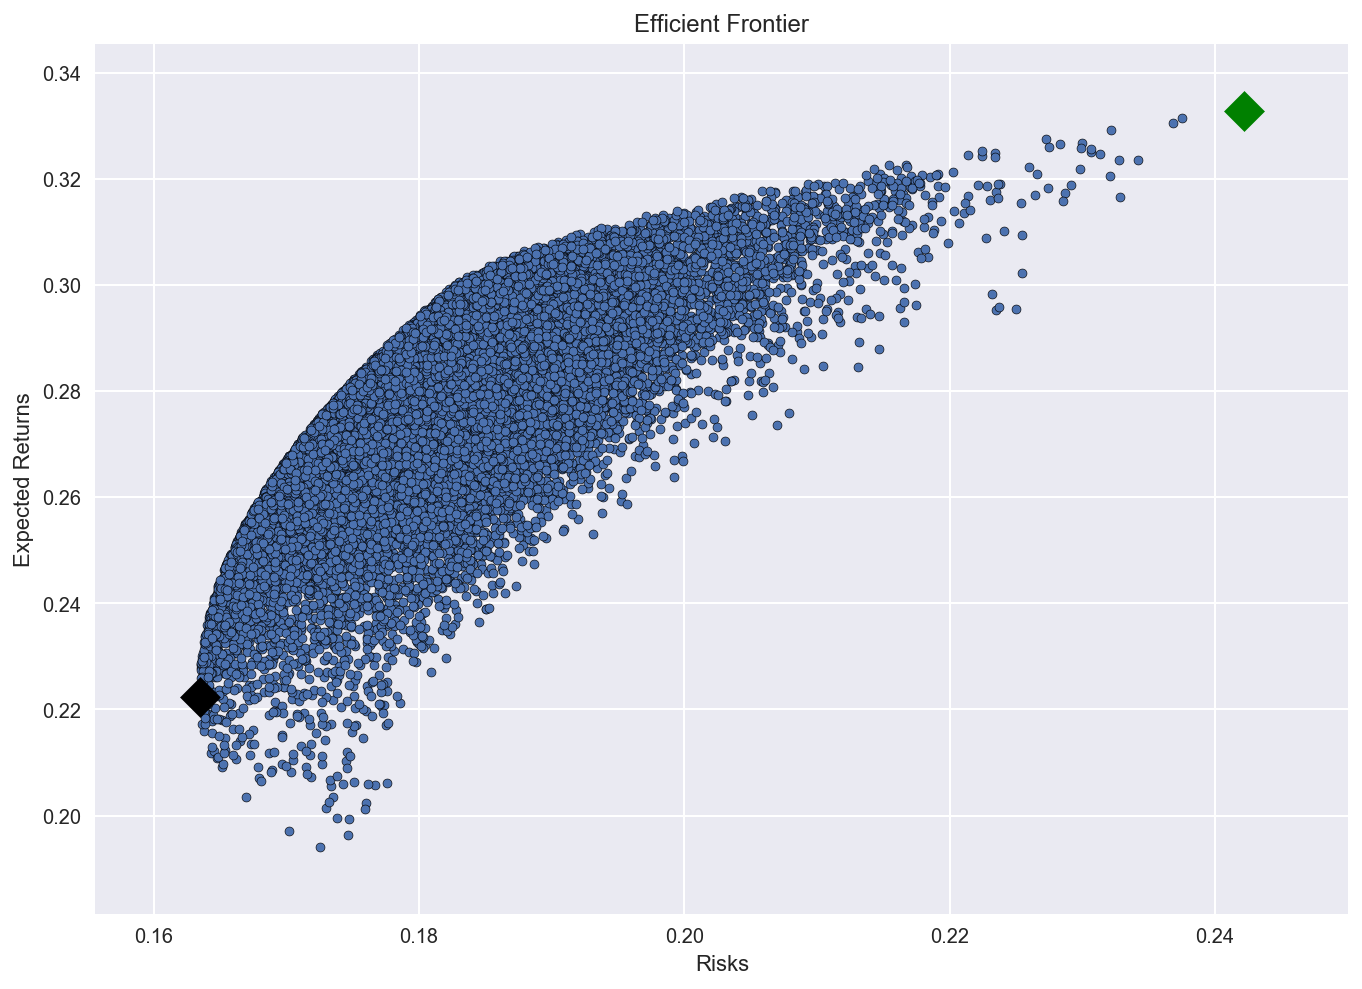

Minimum Risk                  22918
Returns       0.222417
Risks         0.163472
Sharpe Ratio  1.251693
AAPL weight   0.344007
AMZN weight   0.005949
FB weight     0.063331
GOOGL weight  0.586713
Maximum Return                   2329
Returns       0.332948
Risks         0.242187
Sharpe Ratio  1.301259
AAPL weight   0.042407
AMZN weight   0.913218
FB weight     0.040182
GOOGL weight  0.004193


In [146]:
min_risks = df['Risks'].min()
max_returns=df['Returns'].max()

min_risk_port = df.loc[df['Risks'] == min_risks]
returns_portfolio=df.loc[df['Returns']==max_returns]


plt.style.use('seaborn-dark')
df.plot.scatter(x='Risks', y='Returns',
                edgecolors='black', figsize=(10, 8), grid=True)
#plt.scatter(x=sharpe_portfolio['Risks'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_risk_port['Risks'], y=min_risk_port['Returns'], c='black', marker='D', s=200 )
plt.scatter(x=returns_portfolio['Risks'],y=returns_portfolio['Returns'],c='green',marker='D',s=200)
#plt.plot(port_risks,cml_port,color='black')

plt.xlabel('Risks')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

print("Minimum Risk",min_risk_port.T)
print("Maximum Return",returns_portfolio.T)

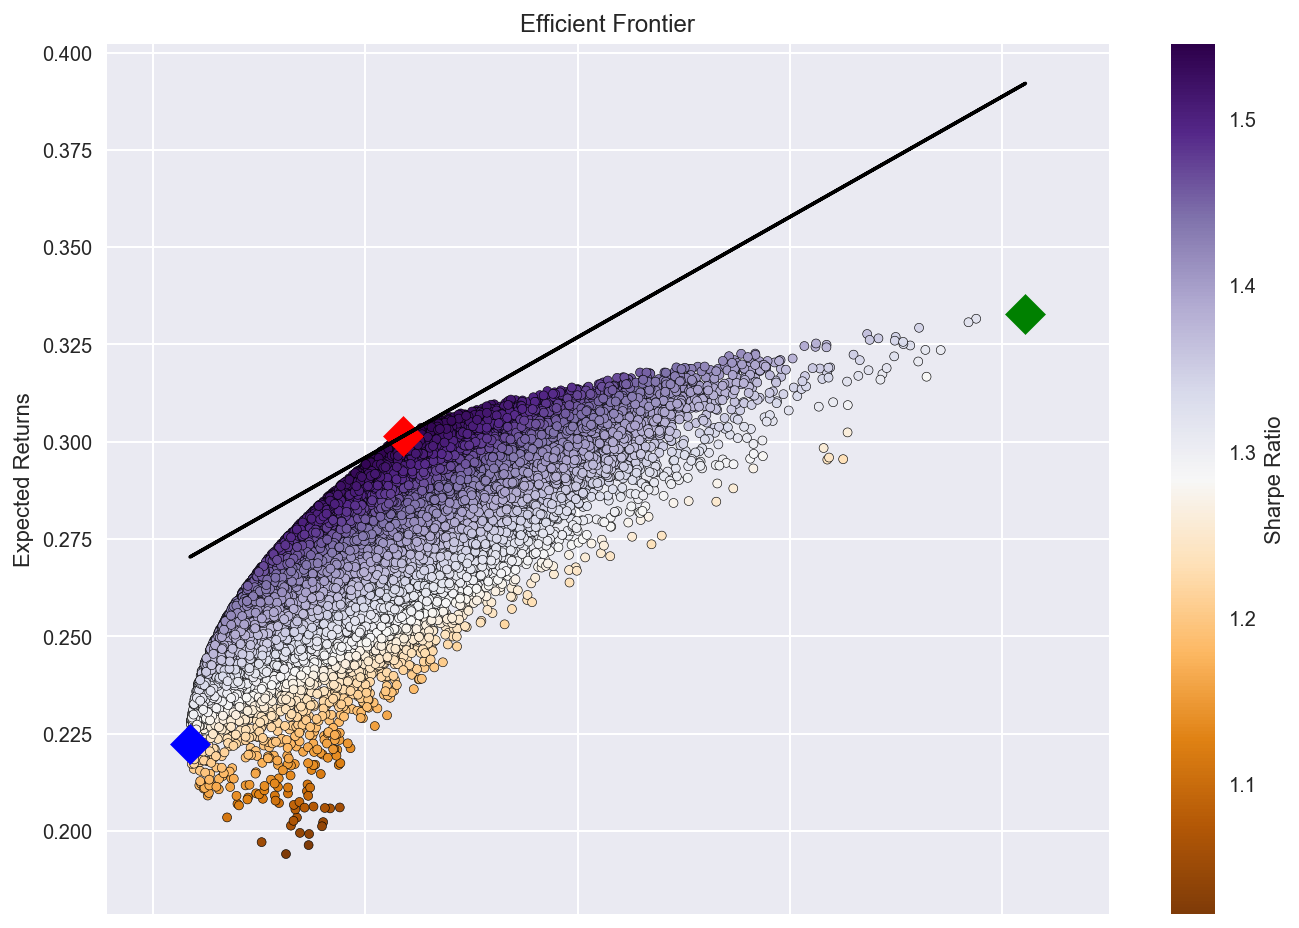

Minimum Risk                  22918
Returns       0.222417
Risks         0.163472
Sharpe Ratio  1.251693
AAPL weight   0.344007
AMZN weight   0.005949
FB weight     0.063331
GOOGL weight  0.586713
Optimised Portfolio                  11544
Returns       0.301506
Risks         0.183584
Sharpe Ratio  1.545374
AAPL weight   0.435712
AMZN weight   0.295533
FB weight     0.267486
GOOGL weight  0.001269


In [148]:
min_risks = df['Risks'].min()
max_sharpe = df['Sharpe Ratio'].max()
max_returns=df['Returns'].max()

sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_risk_port = df.loc[df['Risks'] == min_risks]
returns_portfolio=df.loc[df['Returns']==max_returns]


plt.style.use('seaborn-dark')
df.plot.scatter(x='Risks', y='Returns',c='Sharpe Ratio',cmap='PuOr',
                edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Risks'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_risk_port['Risks'], y=min_risk_port['Returns'], c='blue', marker='D', s=200 )
plt.scatter(x=returns_portfolio['Risks'],y=returns_portfolio['Returns'],c='green',marker='D',s=200)
plt.plot(port_risks,cml_port,color='black')

plt.xlabel('Risks')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

print("Minimum Risk",min_risk_port.T)
print("Optimised Portfolio",sharpe_portfolio.T)

In [78]:
#best result using maximum sharpe ratio weights.
#i.e. 43%in APPLE, 29% IN AMAZON, 26% IN FB.

In [57]:
#but for minimum risk,we can use the weights
# i.e., 34% in APPLE, 6.3% IN FB AND 58% IN GOOGLE......
#(GOOGLE HAS STABLE PLOT)